## Lab 4 - Exploratory Data Analysis with Pandas Matplolib & Seaborn

**Exploratory Data Analysis** (EDA) is the process of analyzing and visualizing a dataset to summarize its main characteristics, often with the help of graphical methods. It aims to uncover patterns, trends, anomalies, and relationships within the data, helping to inform further analysis or modeling.

Wi will use the **[Car Features and MSRP](https://www.kaggle.com)** dataset from [Kaggle](https://www.kaggle.com/datasets/CooperUnion/cardataset), which contains more than 10, 000 samples of different cars with features such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more.

**Exercise 1 - Download the dataset**

You can manually download the dataset or simply use the kagglehub Python library that provides a simple API to access Kaggle resources:

In [1]:
import kagglehub

path = kagglehub.dataset_download("CooperUnion/cardataset")

100%|██████████| 103k/103k [00:00<00:00, 543kB/s]

Extracting files...


The `path` variable contains the directory of the downloades dataset:

In [2]:
!ls -l $path 

total 1444
-rw-r--r-- 1 jupyter-mpenagaricano jupyter-mpenagaricano 1475504 Apr 17 15:23 data.csv


**Exercise 2 - Load the dataset**

Load the dataset as a Pandas DataFrame and check shape and data types. Try to understand what information does each column represent. For the *categorical* (`dtype == np.dtype('O')`) columns you can use the `Series.unique()`, which returns an array with the non-repeated values.

**Exercise 3 - Load the dataset**

Create a *numeric-only* DataFrame (i.e. drop all the categorical columns) and rename the columns to shorter/simpler names using `df.rename(mapping)` where `mapping = {old_name:new_name}` is a dictionary that maps old names to new names. The resulting DataFrame might look like:

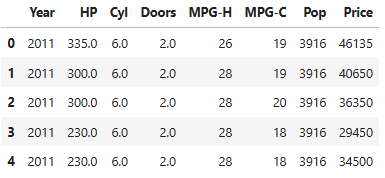

**Exercise 4 - Drop duplicates**

The function `df.duplicated()` returns a mask (boolean Series) with `True` values for each row that has previously appeared (duplicated rows). Since booleans can be used as integers (`True=1` and `False=0`):

1. Get the number of duplicated rows.
1. Use the mask to select unique rows and check shapes (hint: `~` does boolean negation).
1. Use the function `drop_duplicates()` which basically does the same thing and check shapes. 

**Exercise 5 - Drop NA**

Get the number of Null values for each column. If there are Null values, drop them.  

**Exercise 6 - Drop Outliers**

Outliers are data points that significantly differ from the majority of the data in a dataset. They deviate from the expected pattern or distribution and can arise due to errors, anomalies, or rare events. Outliers can mislead training, leading to poor generalization.

Get the price of the most expensive car and plot the kernel density estimation for the prices:

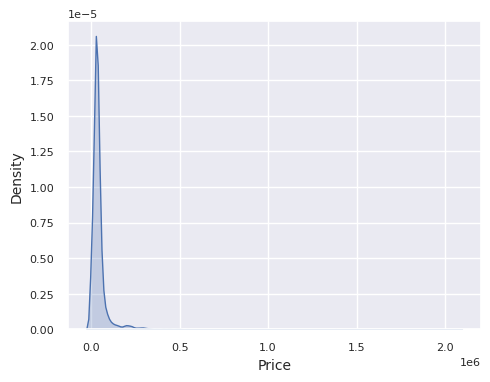

The maximum price, `2065902` is clearly an outlier. A simple (but not perfect) method to drop outliers is to exclude:
* Samples with a value lower than `Q1 - 1.5 * IQR`
* Samples with a value higher than `Q3 + 1.5 * IQR`

where `Q1 = df.quantile(0.25)` (the %25 quantile), `Q3 = df.quantile(0.75)` (the %75 quantile) and `IQR = Q3 - Q1`. Note that a mask such as:

`mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))`

will be a `NxM` boolean DataFrame, but you must drop all the samples (rows) with an outlier value at **any** column. The boolean aggregation function `df.any()` can do it.

After dropping outliers, check again the new price for the most expensive car the kde plot. 

**Exercise 7 - Continue with exploration**

Now you are free to do whatever you want to explore and search patterns, correlations, etc.